In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Bank_Customer_retirement.csv')
data.head()

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [3]:
data.isna().sum()

Customer ID     0
Age             0
401K Savings    0
Retire          0
dtype: int64

In [4]:
data.shape

(500, 4)

In [5]:
# Drop the Customer ID column
data.drop("Customer ID", axis=1, inplace=True)

In [6]:
data.head()

,Age,401K Savings,Retire
0,39.180417,322349.8740,0
1,56.101686,768671.5740,1
2,57.023043,821505.4718,1
3,43.711358,494187.4850,0
4,54.728823,691435.7723,1


C:\Users\Anish\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Anish\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


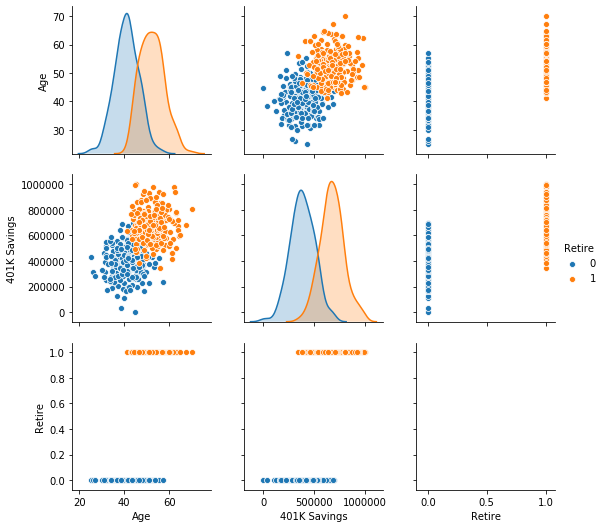

In [7]:
sns.pairplot(data, hue="Retire")

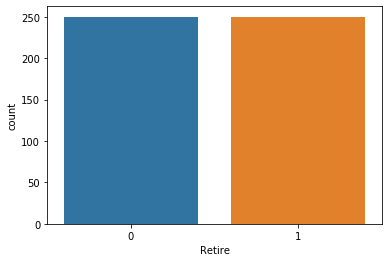

In [8]:
sns.countplot(data["Retire"])

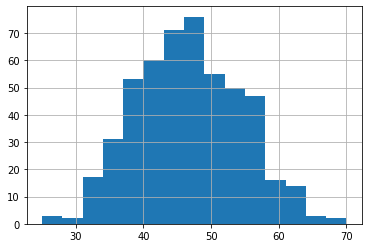

In [9]:
data["Age"].hist(bins=15)

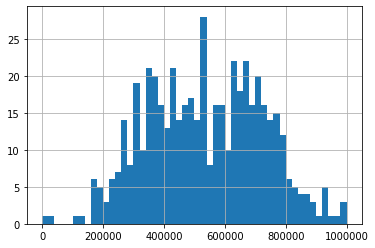

In [10]:
data['401K Savings'].hist(bins=50)

In [11]:
# Prepare data for training and testing
from sklearn.model_selection import train_test_split

X = data.drop('Retire', axis=1)
y = data['Retire']

In [12]:
X

,Age,401K Savings
0,39.180417,322349.8740
1,56.101686,768671.5740
2,57.023043,821505.4718
3,43.711358,494187.4850
4,54.728823,691435.7723
...,...,...
495,46.678128,704243.0776
496,43.545007,483175.9998
497,46.476724,354919.1987
498,50.903631,639789.9219


In [13]:
y

0      0
1      1
2      1
3      0
4      1
      ..
495    1
496    0
497    0
498    1
499    0
Name: Retire, Length: 500, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [16]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_preds = classifier.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(classification_report(y_test, y_preds))
print()
print(accuracy_score(y_test, y_preds))
print()
print(confusion_matrix(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        72
           1       0.93      0.97      0.95        93

    accuracy                           0.94       165
   macro avg       0.94      0.94      0.94       165
weighted avg       0.94      0.94      0.94       165


0.9393939393939394

[[65  7]
 [ 3 90]]
